# Credit card fraud detection

# Context

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# problem statement

# importing libraries

In [1]:
#import libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd


# loading dataset

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.

In [4]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(data.shape)

(284807, 31)


# Checking for missing value

In [6]:
print(data.isnull().values.any())
print(data.isnull().sum())


False
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0]

In [8]:
print(fraud.shape,valid.shape)

(492, 31) (284315, 31)


# Splitting dependent and independent variable

In [10]:
# dividing dependent and independent variable from the dataset 
x = data[['Time','Amount']]
y = data["Class"] 
print(x.shape) 
print(y.shape) 
# (its a numpy array with no columns) 
X = x.values 
Y = y.values 

(284807, 2)
(284807,)


# model building

In [13]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
Xtrain, Xtest, Ytrain, Ytest = train_test_split( 
        X,Y, test_size = 0.2, random_state = 40)

In [14]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(Xtrain, Ytrain) 
# predictions 
ypred = rfc.predict(Xtest) 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(Ytest,ypred)
accuracy=accuracy_score(Ytest,ypred)
print(conf_matrix,accuracy)
print(classification_report(Ytest,ypred))

[[56836    29]
 [   83    14]] 0.9980337769039008
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.33      0.14      0.20        97

    accuracy                           1.00     56962
   macro avg       0.66      0.57      0.60     56962
weighted avg       1.00      1.00      1.00     56962



# Naive bayes

In [15]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(Xtrain, Ytrain)
ypred1=gnb.predict(Xtest)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(Ytest,ypred1)
accuracy=accuracy_score(Ytest,ypred1)
print(conf_matrix,accuracy)
print(classification_report(Ytest,ypred1))


[[56865     0]
 [   97     0]] 0.9982971103542713
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.00      0.00      0.00        97

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DummyClassifier

In [16]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(Xtrain, Ytrain)
ypred2=dummy.predict(Xtest)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(Ytest,ypred2)
accuracy=accuracy_score(Ytest,ypred2)
print(conf_matrix,accuracy)
print(classification_report(Ytest,ypred2))


[[56761   104]
 [   97     0]] 0.9964713317650363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.00      0.00      0.00        97

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


# Support vector classifier

In [17]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(Xtrain,Ytrain)
ypred3=svm.predict(Xtest)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(Ytest,ypred3)
accuracy=accuracy_score(Ytest,ypred3)
print(conf_matrix,accuracy)
print(classification_report(Ytest,ypred3))


[[56865     0]
 [   97     0]] 0.9982971103542713
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.00      0.00      0.00        97

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print(fraud.shape)

(492, 31)


In [19]:
# Lets shuffle the data before creating the subsamples

data1 = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data1 = data1.loc[data1['Class'] == 1]
non_fraud_data1 = data1.loc[data1['Class'] == 0][:492]

normal_distributed_data1 = pd.concat([fraud_data1, non_fraud_data1])

# Shuffle dataframe rows
new_data1 = normal_distributed_data1.sample(frac=1, random_state=42)

new_data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264098,161265.0,0.088637,0.818552,-0.005617,-0.742745,0.708713,-0.734212,0.984081,-0.146136,0.049841,...,-0.308203,-0.724620,-0.006447,-0.670556,-0.406731,0.182126,0.243390,0.089906,5.49,0
79883,58222.0,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,...,0.614969,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,270.00,1
200405,133423.0,1.744979,-0.527634,-3.003229,0.213030,1.045598,-0.687625,1.101537,-0.401025,-0.068283,...,0.421439,0.882281,-0.424463,0.201832,0.773256,0.088724,-0.126212,-0.061178,204.79,0
140786,83934.0,-0.433222,2.428379,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,1.285230,-2.743539,...,0.713559,-0.408954,-0.320890,-0.804230,0.962852,0.199558,1.094533,0.541148,1.00,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


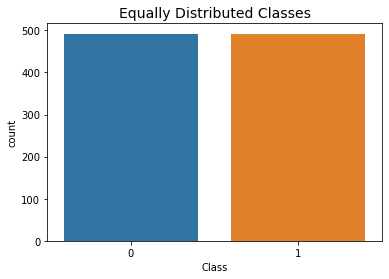

In [20]:
print('Distribution of the Classes in the subsample dataset')
print(new_data1['Class'].value_counts()/len(new_data1))


import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('Class', data=new_data1)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [21]:
# dividing the X and the Y from the dataset 
#X = data.drop(['Class'], axis = 1)
X = new_data1[['Time','Amount']]
Y = new_data1["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
x = X.values 
y = Y.values 

(984, 2)
(984,)


In [22]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        x, y, test_size = 0.2, random_state = 40)

In [23]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfcl = RandomForestClassifier() 
rfcl.fit(xTrain, yTrain) 
# predictions 
yPred4= rfcl.predict(xTest) 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(yTest,yPred4)
accuracy=accuracy_score(yTest,yPred4)
print(conf_matrix,accuracy)
print(classification_report(yTest,yPred4))

[[75 20]
 [29 73]] 0.751269035532995
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        95
           1       0.78      0.72      0.75       102

    accuracy                           0.75       197
   macro avg       0.75      0.75      0.75       197
weighted avg       0.75      0.75      0.75       197

